# Comparing the Accuracy of Three Classification Algorithms

Which of the following three classification algorithms - K-Nearest Neighbors, Support Vector Machine, and Multi-layer Perceptron - will perform the best at classifying the language of a word?

## Load Data

In [1]:
# Load in files
english_file = open("./data/english.txt")
german_file  = open("./data/german.txt",  encoding='latin-1')
spanish_file = open("./data/spanish.txt", encoding='latin-1')

english_words = english_file.readlines()
german_words  = german_file.readlines()
spanish_words = spanish_file.readlines()

print(english_words[1:10])
print(german_words[1:10])
print(spanish_words[1:10])

# Make list of lists of all words
words_dataset = []
words_dataset.append(english_words)
words_dataset.append(german_words)
words_dataset.append(spanish_words)

['aa\n', 'aaa\n', 'aachen\n', 'aardvark\n', 'aardvarks\n', 'aardwolf\n', 'aardwolves\n', 'aarhus\n', 'aaron\n']
['Aachen\n', 'Aal\n', 'Aals\n', 'Aargau\n', 'Aargaus\n', 'Aases\n', 'Aasgeiern\n', 'Aasgeiers\n', 'ABS\n']
['ADSL\n', 'Abad\n', 'AbadÃ\xada\n', 'Abajo\n', 'AbalÃ¡\n', 'Abancay\n', 'Abanga\n', 'AbapÃ³\n', 'Abasolo\n']


## Prepare Data

In [2]:
# words and language are the feature and label, respectively
# language number is 0 for English, 1 for German, and 2 for Spanish
words    = []
language = []
language_number = -1

# function to process data and make feature/label datasets
def word_dataset_preparer(words_dataset):
    
    for word_list in words_dataset:
        global language_number
        language_number += 1
    
        for word in word_list:
            word = word.replace('\n', '')
            
            # only do five-letter words to make this simpler
            if len(word) == 5:
                words.append([ord(letter) for letter in word])
                language.append(language_number)
                
word_dataset_preparer(words_dataset)

print(words[0:5])
print(language[0:5])

[[97, 97, 114, 111, 110], [97, 98, 97, 98, 97], [97, 98, 97, 99, 97], [97, 98, 97, 99, 105], [97, 98, 97, 99, 107]]
[0, 0, 0, 0, 0]


## Train Model and Make Predictions

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(words, language, test_size=.2, random_state=1)

In [4]:
# Three classifiers: K-Nearest Neighbors, Support Vector Machine, and Multilayer Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

knn_model = KNeighborsClassifier()
svm_model = svm.SVC()
mlp_nn = MLPClassifier()

In [5]:
knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
mlp_nn.fit(X_train, y_train)

knn_predicted = knn_model.predict(X_test)
svm_predicted = svm_model.predict(X_test)
mlp_predicted = mlp_nn.predict(X_test)

## Review and Visualize Accuracy

In [6]:
from sklearn.metrics import accuracy_score

knn_accuracy = accuracy_score(y_test, knn_predicted)
svm_accuracy = accuracy_score(y_test, svm_predicted)
mlp_accuracy = accuracy_score(y_test, mlp_predicted)

print(knn_accuracy)
print(svm_accuracy)
print(mlp_accuracy)

0.8254349130173965
0.8272345530893821
0.8149370125974805


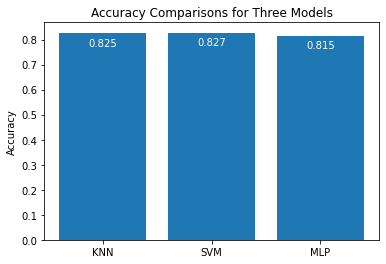

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = ['KNN', 'SVM', 'MLP']
y = [knn_accuracy, svm_accuracy, mlp_accuracy]

plt.bar(x, y)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparisons for Three Models')

# Add values to each bar
for i, v in enumerate(y):
    plt.text(i, v - .05, str(round(v, 3)), ha = 'center', color='white')

plt.show()

In [11]:
from sklearn.metrics import confusion_matrix

knn_confusion = confusion_matrix(y_test, knn_predicted)
svm_confusion = confusion_matrix(y_test, svm_predicted)
mlp_confusion = confusion_matrix(y_test, mlp_predicted)

print(knn_confusion)
print(svm_confusion)
print(mlp_confusion)

[[2194   62    2]
 [ 245  357   82]
 [  90  101  201]]
[[2258    0    0]
 [ 285  328   71]
 [  93  127  172]]
[[2257    1    0]
 [ 302  361   21]
 [ 102  191   99]]


## ROC Curve

In [12]:
# pending...

## Conclusion

The SVM and KNN are about tied for first, whereas the MLP is a percentage point or two lower; however, all models were very accurate. If I had to choose a model for future language classification, I would likely choose the KNN, as it handles low-feature, high-record datasets better than the SVM; however, the SVM did perform better in the confusion matrix, so I would consider it. I will also add the ROC curve in the future to better inform my decision.